## Implementing Back-propagation Algorithm with XOR data

### XOR data: <br>
**$ x_0 \ x_1 \ y$** <br>
$0 \ \ \  0 \ \ \  0$ <br>
$0 \ \ \  1 \ \ \  1$ <br>
$1 \ \ \  0 \ \ \  1$<br>
$1 \ \ \  1 \ \ \  0$<br>

---



In [0]:
import numpy as np
import matplotlib.pyplot as plt

##Activation function

Sigmoid function $$\frac{1}{1+ e^{-x}} $$

In [0]:
#Define our activation function

def sigmoid (x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''
    # YOUR CODE HERE
    y=1/(1+np.exp(-x))
    return y

In [3]:
'''Testing'''
assert sigmoid(0)==0.5
assert np.isclose(sigmoid(-2), 0.119202922, atol=0.0001)
print('Test passed', '\U0001F44D')

Test passed 👍


In [0]:
# Define the activation function derivative

def sigmoid_derivative(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
        y = derivative of sigmoid
    '''
    # YOUR CODE HERE
    y1=x
    return y1-y1**2

In [5]:
'''Testing code for sigmoid_derivative'''
# print(sigmoid_derivative(1))
assert sigmoid_derivative(1) == 0
assert sigmoid_derivative(0) == 0
print('Test passed', '\U0001F44D')


Test passed 👍


## Defining the model

In [0]:
#Define the NeuralNetwork class

class NeuralNetwork:
    def __init__(self, net_arch):
        '''   
        Input:
            net_arch: list of 3 integers
        Action:
            Creates instance variables:
                self.input: np array of shape (ni,1)
                self.layer1: nprarray of shape (nh,1)
                self.output: np array of shape (no,1)
                self.weights1: np array of shape (nh, ni), initialized randomly between (-1,1)
                self.weights2: np array of shape (no, nh), initialized randomly between (-1,1)
                
            NOTE: We do not use bias explicitly here. Input x can have the first element 1 to have a bias term.
        '''
        ni = net_arch[0]  ## Number of neurons in input layer    
        nh = net_arch[1]  ## Number of neurons in hidden layer
        no = net_arch[2]  ## Number of neurons in output layer
        
        self.ni = ni
        self.nh = nh
        self.no = no
        
        # YOUR CODE HERE
        self.input=np.zeros((self.ni,1))
        self.layer1=np.zeros((self.nh,1))
        self.output=np.zeros((self.no,1))
        self.weights1=(np.random.random((self.nh,self.ni))*2)-1
        self.weights2=(np.random.random((self.no,self.nh))*2)-1
#         self.v1=np.zeros((self.nh,1))
        
    def feedforward(self,x):
        '''
        Input:
            x: numpy array of shape (ni,1)
        Action:
            
        Return:
            output: numpy array of shape (no,1),
        '''
        # YOUR CODE HERE
#         v1=np.zeros((self.nh,1))
        for i in range(0,self.nh):
          self.layer1[i]=sigmoid(self.weights1[i].dot(x))
        y=np.zeros((self.no,1))
        for i in range(0,self.no):
          y[i]=sigmoid(self.weights2[i].dot(self.layer1))
        return y
#         self.layer1=sigmoid(self.weights1.dot(x))
#         y=sigmoid(self.weights2.dot(self.layer1))
#         return y
            
    def backprop(self,x,y,eta):
      yd=y
      yp=self.feedforward(x)
      e=yd-yp#no,1
      
      del2=np.zeros((self.no,1))
      del_weights2=np.zeros((self.no,self.nh))
      del_weights1=np.zeros((self.nh,self.ni))
      
      for i in range(0,self.no):
        for j in range(0,self.nh):
          del2[i]=e[i]*yp[i]*(1-yp[i])
          del_weights2[i][j]=del2[i]*self.layer1[j]
          self.weights2[i][j]+=eta*del_weights2[i][j]
          
      for i in range(0,self.nh):
        for j in range(0,self.ni):
          sum=0
          for h in range(0,self.no):
            sum+=del2[h]*self.weights2[h][i]
          del_weights1[i][j]=self.layer1[i]*(1-self.layer1[i])*self.input[j]*sum
          self.weights1[i][j]+=eta*del_weights1[i][j]
        
#       del2=e.dot(yp.T.dot(1-yp))
#       del_weights2=del2.dot(self.v1.T)
#       del1=self.weights2.T.dot(del2).dot(self.v1.T.dot(1-self.v1))
#       del_weights1=del1.dot(x.T)
#       self.weights1+=eta*del_weights1
#       self.weights2+=eta*del_weights2

    def fit(self, X, Y, eta, epochs):
        '''
        input:
        X: training input data of shape (4,2)
        Y: training output of shape (4,1)
        eta: learning rate
        epochs: number of epochs
        Action:
        # Modify the input by adding ones of shape(4,1) 
        # Set up the feed-forward propagation for the modified input   
        # Set up the back-propagation of the error to adjust the weights
        '''
        # YOUR CODE HERE
        arr1=np.ones((4,1))
        X=np.concatenate((X,arr1),axis=1)
#         print(X)
        yd=Y
        for i in range(0,epochs):
          for j in range(0,X.shape[0]):
            x=X[j].T
            self.backprop(x,yd,eta)
#         X=X.T
#         print(X)
#         yd=Y
#         yp=self.feedforward(X)
#         for i in range(epochs):
#           self.backprop(X,yd,eta)
        
        
        
    def predict(self,x,y): 
        '''
        # Predict function is used to check the prediction result of the neural network
        Input:
        x: single input data of shape (1,3)
        y: single output data of shape (1,1)
        Action
        pred_out: predict the output based on the model using feedforward
        
        Output
        error: y - pred_out
        
        
        '''
        # YOUR CODE HERE
        yp=self.feedforward(x)
        error= (y-yp)**2
        return(error*0.5)
        

In [7]:
'''Testing code for __init__'''

net_arch = [3,4,1]
nn1 = NeuralNetwork(net_arch)
assert nn1.input.shape==(3,1)
assert nn1.layer1.shape == (4,1)
assert nn1.output.shape == (1,1)
assert np.all(nn1.weights1 < 1)
print('Test passed', '\U0001F44D')


Test passed 👍


In [8]:
'''Testing code for feedforward'''

def feedforward_original(nn1,x):
    assert x.shape == (nn1.ni, 1)
    layer1 = sigmoid(np.dot(nn1.weights1, x))
    output = sigmoid(np.dot(nn1.weights2, layer1))
    return output
x = np.array([0,1,1]).reshape(-1, 1)
assert nn1.feedforward(x) == feedforward_original(nn1, x)
print('Test passed', '\U0001F44D')

Test passed 👍


In [9]:
'''Testing code for backprop'''
def backprop_original(nn1,x,y,eta):
    weights1 = nn1.weights1
    weights2 = nn1.weights2
    del_weights2 = np.dot(((y - nn1.output) * sigmoid_derivative(nn1.output)),nn1.layer1.reshape(-1, 1).T)
    del_weights1 = np.dot(((y - nn1.output) * sigmoid_derivative(nn1.output)*nn1.weights2.T * sigmoid_derivative(nn1.layer1)), x.T)

    # update the weights with the derivative (slope) of the loss function
    weights1 += eta*del_weights1
    weights2 += eta*del_weights2
    return(weights1, weights2)

x = np.array([0,1,1]).reshape(-1, 1)
y = np.array([[0],])
eta = 1
nn1.backprop(x, y, eta)
w1, w2 = backprop_original(nn1, x, y, eta) 
assert np.all(np.isclose(w1, nn1.weights1))
assert np.all(np.isclose(w2, nn1.weights2))
print('Test passed', '\U0001F44D')

Test passed 👍


## Fitting the data (Training)

In [0]:
## CHECK THE PERFORMANCE
'''
Input:
# Set the input data
X = ([[0.1, 0.1], [0.1, 0.9],
                [0.9, 0.1], [0.9, 0.9]])
# Set the labels, the correct results for the xor operation
Y = ([[0.1], [0.9], 
                 [0.9], [0.1]])
Action:
# Initialize the NeuralNetwork with
# 3 input neurons
# 4 hidden neurons
# 1 output neuron

# Fit the datas
'''
# YOUR CODE HERE
# X=np.array([[0.1, 0.1], [0.1, 0.9],
#                 [0.9, 0.1], [0.9, 0.9]])
# Y=np.array([[0.1], [0.9], 
#                  [0.9], [0.1]])
nn1= NeuralNetwork([3,4,1])


In [11]:
'''Testing for fit'''
X = np.array([[0.1, 0.1], [0.1, 0.9],
                [0.9, 0.1], [0.9, 0.9]])
# Set the labels, the correct results for the xor operation
Y = np.array([[0.1], [0.9], 
                 [0.9], [0.1]])
nn1.fit(X,Y,1,10000)
x = np.array([1,1,1]).reshape(-1, 1)
y = np.array([[0],])
print(nn1.feedforward(x),y)
assert np.all(np.isclose(nn1.feedforward(x),y,atol=0.1))
print('Test passed', '\U0001F44D')

[[0.09884129]] [[0]]
Test passed 👍


## Plotting 

In [0]:
def plotting(X, Y):
  x_plot = X.T
  color = []
  for i in Y:
    if i[0] == 0.1:
      color.append('g')
    else:
      color.append('r')
  color = np.array(color)
  print(x_plot)
  plt.figure()
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.scatter(x_plot[0],x_plot[1],color=color)
  plt.show()

[[0.1 0.1 0.9 0.9]
 [0.1 0.9 0.1 0.9]]


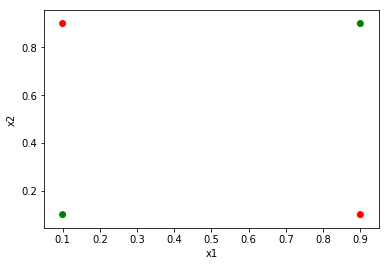

In [13]:
plotting(X, Y)

## Could you test it now?

Find the error between the predicted output and the desired output.

In [0]:
def testing(X, Y):
  ones = 0.9*np.ones((X.shape[0],1))
  print(X.shape,ones.shape)
  x_test = np.concatenate([ones, X], axis=1)
  y_test = Y
  
  for k in range(0,X.shape[0]):
    print(nn.predict(x_test[k].reshape(-1, 1),y_test[k]))
    

In [15]:
'''Testing the prediction'''
x = np.array([0.9,0.9,0.9]).reshape(-1, 1)
y = np.array([[0.1],])

assert np.all(np.isclose(nn1.predict(x,y),0, atol=0.01))
print('Test passed', '\U0001F44D')

Test passed 👍


# Advanced
## Does the performance increase with increasing the number of neurons in the hidden layer?
- Repeat the training with 1 neuron in the hidden layer, then with 3 neuron and then with 5 neuron in the hidden layer to see the trend in performance
- Compare the training error
- Compare the testing error

In [0]:
NH=np.array([1,3,5])

In [17]:
for elem in NH:
  net_arch = [3,elem,1]
  nn = NeuralNetwork(net_arch)
  X = np.array([[0.1, 0.1], [0.1, 0.9],
                [0.9, 0.1], [0.9, 0.9]])
# Set the labels, the correct results for the xor operation
  Y = np.array([[0.1], [0.9], 
                 [0.9], [0.1]])
  nn.fit(X,Y,1,10000)
  print("For N =",elem)
#   train_error=nn1.predict(X,Y)
  print("train_error = ")
  testing(X,Y)
  x_test=np.array([0,1]).reshape(1,2)
  y_test=np.array([1])
#   print(x_test)
  print("\ntesting error=")
  testing(x_test,y_test)
  print("=========================================================================================================================================================")
  

For N = 1
train_error = 
(4, 2) (4, 1)
[[0.00019813]]
[[0.30919014]]
[[0.31752894]]
[[2.86869078e-06]]

testing error=
(1, 2) (1, 1)
[[0.39160473]]
For N = 3
train_error = 
(4, 2) (4, 1)
[[3.96664792e-08]]
[[0.31997706]]
[[0.32631643]]
[[2.36030152e-05]]

testing error=
(1, 2) (1, 1)
[[0.40434881]]
For N = 5
train_error = 
(4, 2) (4, 1)
[[0.0013116]]
[[0.32691287]]
[[0.3613886]]
[[9.98552188e-06]]

testing error=
(1, 2) (1, 1)
[[0.40740278]]
